In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from apriori_python import apriori as apriori1
from apyori import apriori as apriori2
from efficient_apriori import apriori as apriori3
from fpgrowth_py import fpgrowth

### Задания 1-2
Загрузить данные Market_Basket_Optimisation.csv.
Визуализировать данные (отразить на гистограммах относительную и фактическую частоту встречаемости для 20 наиболее популярных товаров).

In [2]:
df = pd.read_csv("data/Market_Basket_Optimisation.csv")

<Axes: title={'center': 'Relative frequency'}>

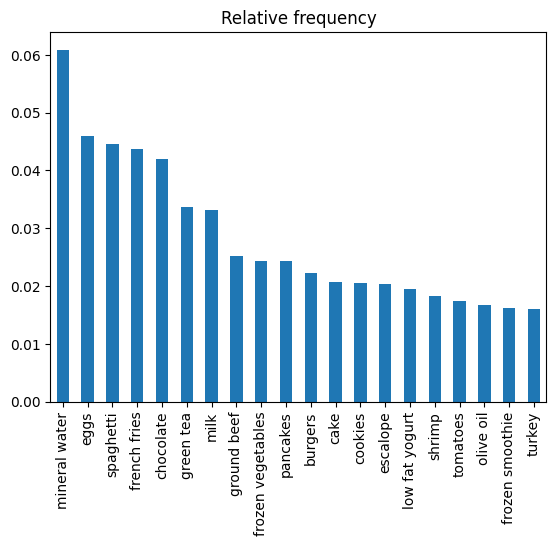

In [3]:
df.stack().value_counts(normalize=True)[:20].plot(
    title='Relative frequency', kind='bar')

<Axes: title={'center': 'Actual frequency'}>

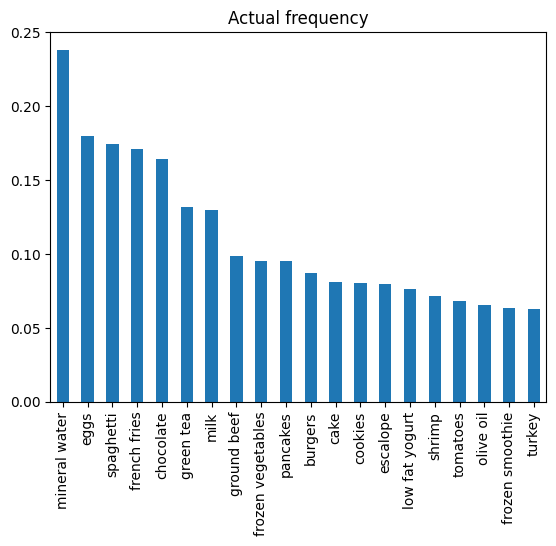

In [4]:
df.stack().value_counts().apply(lambda item: item / df.shape[0])[:20].plot(
    title='Actual frequency', kind='bar')

### Задание 3
Применить алгоритм Apriori, используя 3 разные библиотеки (apriori_python, apyori, efficient_apriori). Подобрать гиперпараметры для алгоритмов так, чтобы выводилось порядка 10 наилучших правил.

In [5]:
transactions = []
for i in range(df.shape[0]):
    row = df.iloc[i].dropna().tolist()
    transactions.append(row)
    
t = dict()

In [6]:
start = time.perf_counter()
_, rules = apriori1(transactions, minSup=0.04, minConf=0.2)
t['apriori_py'] = time.perf_counter() - start

In [7]:
rules

[[{'mineral water'}, {'milk'}, 0.20145495243424735],
 [{'mineral water'}, {'eggs'}, 0.21376608841634023],
 [{'mineral water'}, {'chocolate'}, 0.22104085058757694],
 [{'mineral water'}, {'spaghetti'}, 0.2506994963626189],
 [{'eggs'}, {'mineral water'}, 0.28338278931750743],
 [{'chocolate'}, {'mineral water'}, 0.3213995117982099],
 [{'spaghetti'}, {'mineral water'}, 0.3430321592649311],
 [{'milk'}, {'mineral water'}, 0.37037037037037035],
 [{'ground beef'}, {'mineral water'}, 0.41655359565807326]]

In [8]:
start = time.perf_counter()
rules = apriori2(transactions=transactions,
                 min_support=0.04,
                 min_confidence=0.2,
                 min_lift=1.0001)
t['apyori'] = time.perf_counter() - start
results = list(rules)

In [9]:
for res in results:
    for sub in res[2]:
        rule = f"{', '.join(sub[0])} -> {', '.join(sub[1])}"
        print(f"{rule}{' '*(30 - len(rule))}\t"
              f"Sup.: {res[1]:.5f}; Conf.: {sub[2]:.5f}, Lift: {sub[3]:.5f}")

chocolate -> mineral water    	Sup.: 0.05267; Conf.: 0.32140, Lift: 1.34891
mineral water -> chocolate    	Sup.: 0.05267; Conf.: 0.22104, Lift: 1.34891
eggs -> mineral water         	Sup.: 0.05093; Conf.: 0.28338, Lift: 1.18935
mineral water -> eggs         	Sup.: 0.05093; Conf.: 0.21377, Lift: 1.18935
ground beef -> mineral water  	Sup.: 0.04093; Conf.: 0.41655, Lift: 1.74827
milk -> mineral water         	Sup.: 0.04800; Conf.: 0.37037, Lift: 1.55444
mineral water -> milk         	Sup.: 0.04800; Conf.: 0.20145, Lift: 1.55444
mineral water -> spaghetti    	Sup.: 0.05973; Conf.: 0.25070, Lift: 1.43970
spaghetti -> mineral water    	Sup.: 0.05973; Conf.: 0.34303, Lift: 1.43970


In [10]:
start = time.perf_counter()
itemsets, rules = apriori3(transactions, min_support=0.04, min_confidence=0.2)
t['eff_apriori'] = time.perf_counter() - start

In [11]:
for i in range(len(rules)):
    print(rules[i])

{mineral water} -> {chocolate} (conf: 0.221, supp: 0.053, lift: 1.349, conv: 1.073)
{chocolate} -> {mineral water} (conf: 0.321, supp: 0.053, lift: 1.349, conv: 1.123)
{mineral water} -> {eggs} (conf: 0.214, supp: 0.051, lift: 1.189, conv: 1.043)
{eggs} -> {mineral water} (conf: 0.283, supp: 0.051, lift: 1.189, conv: 1.063)
{ground beef} -> {mineral water} (conf: 0.417, supp: 0.041, lift: 1.748, conv: 1.306)
{mineral water} -> {milk} (conf: 0.201, supp: 0.048, lift: 1.554, conv: 1.090)
{milk} -> {mineral water} (conf: 0.370, supp: 0.048, lift: 1.554, conv: 1.210)
{spaghetti} -> {mineral water} (conf: 0.343, supp: 0.060, lift: 1.440, conv: 1.159)
{mineral water} -> {spaghetti} (conf: 0.251, supp: 0.060, lift: 1.440, conv: 1.102)


### Задание 4
Применить алгоритм FP-Growth из библиотеки fpgrowth_py. Подобрать гиперпараметры для алгоритма так, чтобы выводилось порядка 10 наилучших правил.

In [12]:
start = time.perf_counter()
itemsets, rules = fpgrowth(transactions, minSupRatio=0.04, minConf=0.2)
t['fpgrowth'] = time.perf_counter() - start

In [13]:
for i in range(len(rules)):
    print(rules[i])

[{'ground beef'}, {'mineral water'}, 0.41655359565807326]
[{'milk'}, {'mineral water'}, 0.37037037037037035]
[{'mineral water'}, {'milk'}, 0.20145495243424735]
[{'chocolate'}, {'mineral water'}, 0.3213995117982099]
[{'mineral water'}, {'chocolate'}, 0.22104085058757694]
[{'spaghetti'}, {'mineral water'}, 0.3430321592649311]
[{'mineral water'}, {'spaghetti'}, 0.2506994963626189]
[{'eggs'}, {'mineral water'}, 0.28338278931750743]
[{'mineral water'}, {'eggs'}, 0.21376608841634023]


### Задание 5
Сравнить время выполнения всех алгоритмов и построить гистограмму.

Time elapsed - apriori_py:    	0.9030118 s
Time elapsed - apyori:        	0.0000488 s
Time elapsed - eff_apriori:   	0.0114323 s
Time elapsed - fpgrowth:      	0.1759886 s


<BarContainer object of 4 artists>

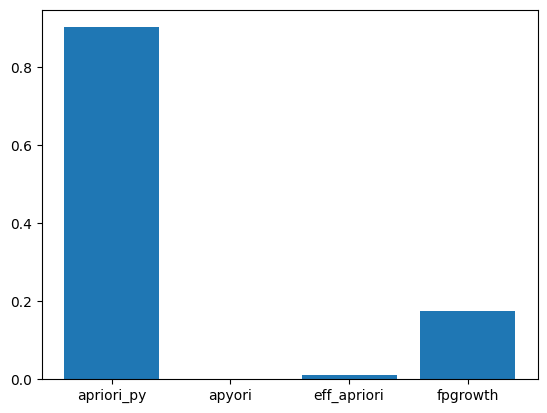

In [14]:
for k, v in t.items():
    text = f"Time elapsed - {k}:"
    print(f"{text}{' '*(30 - len(text))}\t{v:.7f} s")
plt.bar(*zip(*t.items()))

### Задания 6-7
Загрузить данные data.csv.
Визуализировать данные (отразить на гистограммах относительную и фактическую частоту встречаемости для 20 наиболее популярных товаров).

In [15]:
df = pd.read_csv("data/data.csv")

<Axes: title={'center': 'Relative frequency'}>

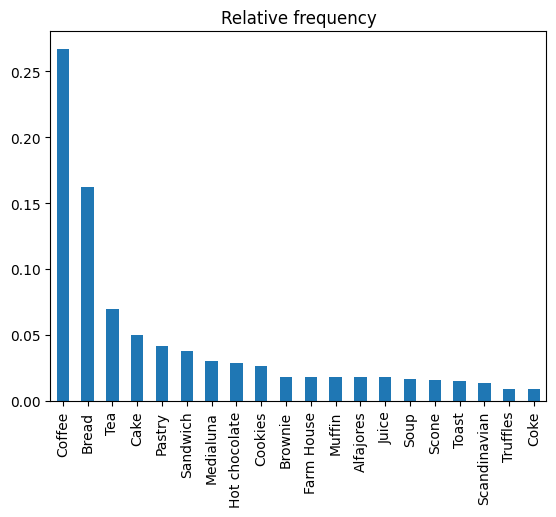

In [16]:
df.stack().value_counts(normalize=True)[:20].plot(
    title='Relative frequency', kind='bar')

<Axes: title={'center': 'Actual frequency'}>

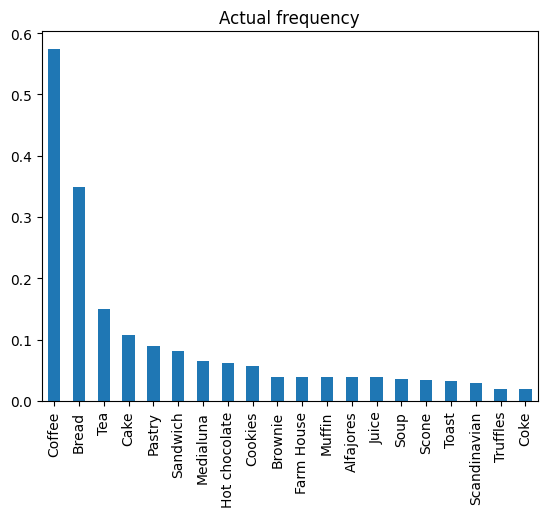

In [17]:
df.stack().value_counts().apply(lambda item: item / df.shape[0])[:20].plot(
    title='Actual frequency', kind='bar')

### Задание 8
Применить алгоритм Apriori, используя 3 разные библиотеки (apriori_python, apyori, efficient_apriori). Подобрать гиперпараметры для алгоритмов так, чтобы выводилось порядка 10 наилучших правил.

In [18]:
transactions = []
for i in range(df.shape[0]):
    row = df.iloc[i].dropna().tolist()
    transactions.append(row)
    
t = dict()

In [19]:
start = time.perf_counter()
_, rules = apriori1(transactions, minSup=0.025, minConf=0.2)
t['apriori_py'] = time.perf_counter() - start

In [20]:
rules

[[{'Bread'}, {'Coffee'}, 0.2751937984496124],
 [{'Pastry'}, {'Bread'}, 0.33865030674846625],
 [{'Tea'}, {'Coffee'}, 0.3496296296296296],
 [{'Hot chocolate'}, {'Coffee'}, 0.5072463768115942],
 [{'Cookies'}, {'Coffee'}, 0.5184466019417475],
 [{'Cake'}, {'Coffee'}, 0.5269582909460834],
 [{'Sandwich'}, {'Coffee'}, 0.5323529411764706],
 [{'Pastry'}, {'Coffee'}, 0.5521472392638037],
 [{'Medialuna'}, {'Coffee'}, 0.5692307692307692]]

In [21]:
start = time.perf_counter()
rules = apriori2(transactions=transactions,
                 min_support=0.025,
                 min_confidence=0.2,
                 min_lift=1.0001)
t['apyori'] = time.perf_counter() - start
results = list(rules)

In [22]:
for res in results:
    for sub in res[2]:
        rule = f"{', '.join(sub[0])} -> {', '.join(sub[1])}"
        print(f"{rule}{' '*(30 - len(rule))}\t"
              f"Sup.: {res[1]:.5f}; Conf.: {sub[2]:.5f}, Lift: {sub[3]:.5f}")

Pastry -> Bread               	Sup.: 0.02896; Conf.: 0.33865, Lift: 1.04242
Cake -> Coffee                	Sup.: 0.05435; Conf.: 0.52696, Lift: 1.10908
Cookies -> Coffee             	Sup.: 0.02802; Conf.: 0.51845, Lift: 1.09117
Hot chocolate -> Coffee       	Sup.: 0.02938; Conf.: 0.50725, Lift: 1.06759
Medialuna -> Coffee           	Sup.: 0.03494; Conf.: 0.56923, Lift: 1.19805
Pastry -> Coffee              	Sup.: 0.04722; Conf.: 0.55215, Lift: 1.16209
Sandwich -> Coffee            	Sup.: 0.03799; Conf.: 0.53235, Lift: 1.12043


In [23]:
start = time.perf_counter()
itemsets, rules = apriori3(transactions, min_support=0.025, min_confidence=0.2)
t['eff_apriori'] = time.perf_counter() - start

In [24]:
for i in range(len(rules)):
    print(rules[i])

{Bread} -> {Coffee} (conf: 0.275, supp: 0.089, lift: 0.579, conv: 0.724)
{Pastry} -> {Bread} (conf: 0.339, supp: 0.029, lift: 1.042, conv: 1.021)
{Cake} -> {Coffee} (conf: 0.527, supp: 0.054, lift: 1.109, conv: 1.110)
{Cookies} -> {Coffee} (conf: 0.518, supp: 0.028, lift: 1.091, conv: 1.090)
{Hot chocolate} -> {Coffee} (conf: 0.507, supp: 0.029, lift: 1.068, conv: 1.065)
{Medialuna} -> {Coffee} (conf: 0.569, supp: 0.035, lift: 1.198, conv: 1.218)
{Pastry} -> {Coffee} (conf: 0.552, supp: 0.047, lift: 1.162, conv: 1.172)
{Sandwich} -> {Coffee} (conf: 0.532, supp: 0.038, lift: 1.120, conv: 1.122)
{Tea} -> {Coffee} (conf: 0.350, supp: 0.050, lift: 0.736, conv: 0.807)


### Задание 9
Применить алгоритм FP-Growth из библиотеки fpgrowth_py. Подобрать гиперпараметры для алгоритма так, чтобы выводилось порядка 10 наилучших правил.

In [25]:
start = time.perf_counter()
itemsets, rules = fpgrowth(transactions, minSupRatio=0.025, minConf=0.2)
t['fpgrowth'] = time.perf_counter() - start

In [26]:
for i in range(len(rules)):
    print(rules[i])

[{'Toast'}, {'Coffee'}, 0.7044025157232704]
[{'Juice'}, {'Coffee'}, 0.5342465753424658]
[{'Alfajores'}, {'Coffee'}, 0.5406976744186046]
[{'Cookies'}, {'Coffee'}, 0.5184466019417475]
[{'Hot chocolate'}, {'Coffee'}, 0.5072463768115942]
[{'Medialuna'}, {'Coffee'}, 0.5692307692307692]
[{'Sandwich'}, {'Coffee'}, 0.5323529411764706]
[{'Pastry'}, {'Bread'}, 0.33865030674846625]
[{'Pastry'}, {'Coffee'}, 0.5521472392638037]
[{'Cake'}, {'Bread'}, 0.22482197355035605]
[{'Cake'}, {'Tea'}, 0.2288911495422177]
[{'Cake'}, {'Coffee'}, 0.5269582909460834]
[{'Tea'}, {'Coffee'}, 0.3496296296296296]
[{'Bread'}, {'Coffee'}, 0.2751937984496124]


### Задание 10
Сравнить время выполнения всех алгоритмов и построить гистограмму.

Time elapsed - apriori_py:    	0.3821374 s
Time elapsed - apyori:        	0.0000468 s
Time elapsed - eff_apriori:   	0.0058384 s
Time elapsed - fpgrowth:      	0.1727490 s


<BarContainer object of 4 artists>

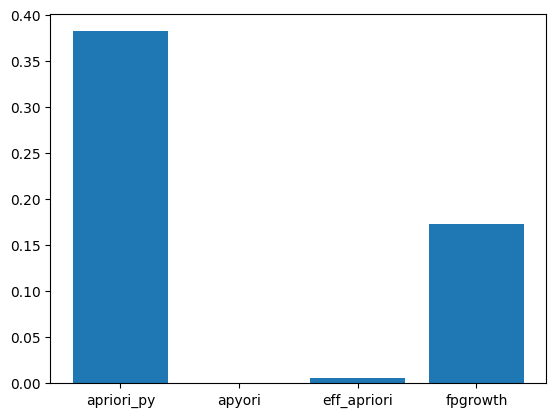

In [27]:
for k, v in t.items():
    text = f"Time elapsed - {k}:"
    print(f"{text}{' '*(30 - len(text))}\t{v:.7f} s")
plt.bar(*zip(*t.items()))

### Выводы
В представленных данных значение поддержки в лучшем случае достигает S = 0.05, что означает слабую связь и неубедительность ассоциативных правил.

На представленных данных по скорости работы лучше всего себя показали алгоритмы из библиотек apyori и efficient_apriori, тогда как алгоритм из библиотеки apriori_python работал сравнительно очень долго. Скорее всего это связано с оптимизацией этих алгоритмов при низких параметрах минимальной поддержки и убедительности.

На первом наборе данных все алгоритмы выявляли один и тот же список правил, тогда как на втором наборе алгоритмы при одинаковых параметрах выявляли различный список правил.